In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sns
import datetime
import numpy as np

# Funciones auxiliares

In [2]:
def conectar_base_datos():
    SERVER = 'ACHEPE'
    DATABASE = 'elecciones-IA-data'

    connectionString = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;'

    conn = pyodbc.connect(connectionString) 
    return conn

conn = conectar_base_datos()
cursor = conn.cursor()

In [3]:
def consultar(sql_statement):
    conn = conectar_base_datos()
    cursor = conn.cursor()
    SQL_STATEMENT = f"""
        {sql_statement}
    """
    consulta = cursor.execute(SQL_STATEMENT) 
    return consulta 

In [4]:
def pasar_a_DF(dat_cursor):
    columnas = dat_cursor.description
    nombre = []
    datos = []

    for i in range(len(columnas)):
        nombre.append(columnas[i][0])
        datos.append([])

    for fila in dat_cursor:
        for i in range(len(columnas)):
            datos[i].append(fila[i])
    
    diccionario = dict()
    for i in range(len(columnas)):
        diccionario[nombre[i]] = datos[i]

    df = pd.DataFrame(diccionario)

    return df

# Ideas

Graficar cantidad publicaciones por partido politicos en el tiempo
Graficar cantidad likes por partido politicos en el tiempo

Graficar cantidad publicaciones de cada fuente en el tiempo
Graficar cantidad likes de cada fuente en el tiempo

# Cantidad publicaciones por fuente en el tiempo


Consulta

In [5]:
SQL_STATEMENT = f"""
       SELECT *
       FROM Publicaciones
"""
data = consultar(SQL_STATEMENT)

In [6]:
df_publicaciones = pasar_a_DF(data)

Text(0.5, 1.0, 'Cantidad de publicaciones recopiladas')

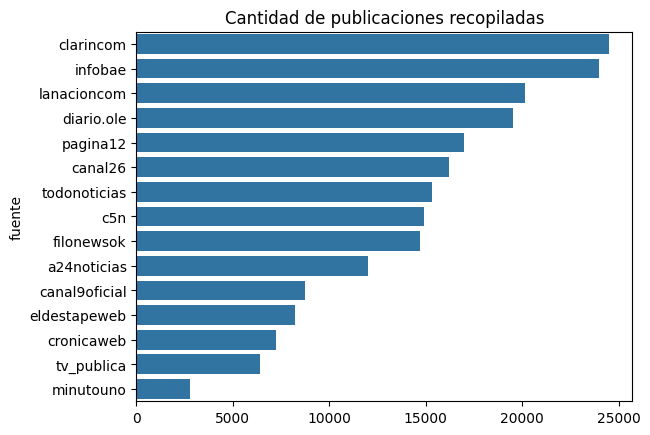

In [7]:
orden = df_publicaciones['fuente'].value_counts().index
sns.countplot(data=df_publicaciones,y='fuente',order=orden)
plt.xlabel('')
plt.title('Cantidad de publicaciones recopiladas')

In [8]:
#df['anio_mes_semana'] = df['fecha'].map(lambda x:str(x.year)+str(x.month)+str(x.day % 4))

In [9]:
df_publicaciones.sort_values(by='fecha',inplace=True,ascending=True)
df_graficar= df_publicaciones[df_publicaciones['fecha']>datetime.datetime(2023,6,1)]

Text(5.484787037037046, 0.5, '')

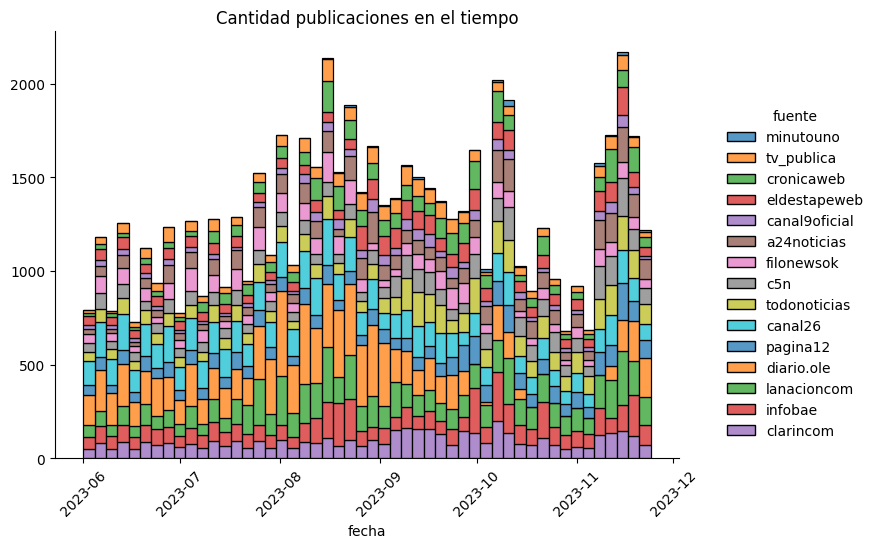

In [10]:
orden_hue = df_publicaciones['fuente'].value_counts().index 
sns.displot(data=df_graficar,x="fecha", hue="fuente", 
            multiple="stack",palette='tab10',kind='hist',
            hue_order=orden_hue[::-1],
            bins=50,aspect=1.5)
plt.xticks(rotation=45)
plt.title('Cantidad publicaciones en el tiempo')
plt.ylabel('')

In [11]:
df_graficar.groupby('fuente').max()['fecha']

fuente
a24noticias     2023-11-23 22:35:02
c5n             2023-11-23 21:57:48
canal26         2023-11-23 22:32:10
canal9oficial   2023-11-23 19:43:08
clarincom       2023-11-23 20:00:37
cronicaweb      2023-11-23 22:14:00
diario.ole      2023-11-23 21:17:16
eldestapeweb    2023-11-23 23:30:43
filonewsok      2023-11-23 23:36:31
infobae         2023-11-23 18:58:01
lanacioncom     2023-11-23 20:37:16
minutouno       2023-11-23 18:02:05
pagina12        2023-11-23 20:24:15
todonoticias    2023-11-23 19:00:33
tv_publica      2023-11-23 23:02:41
Name: fecha, dtype: datetime64[ns]

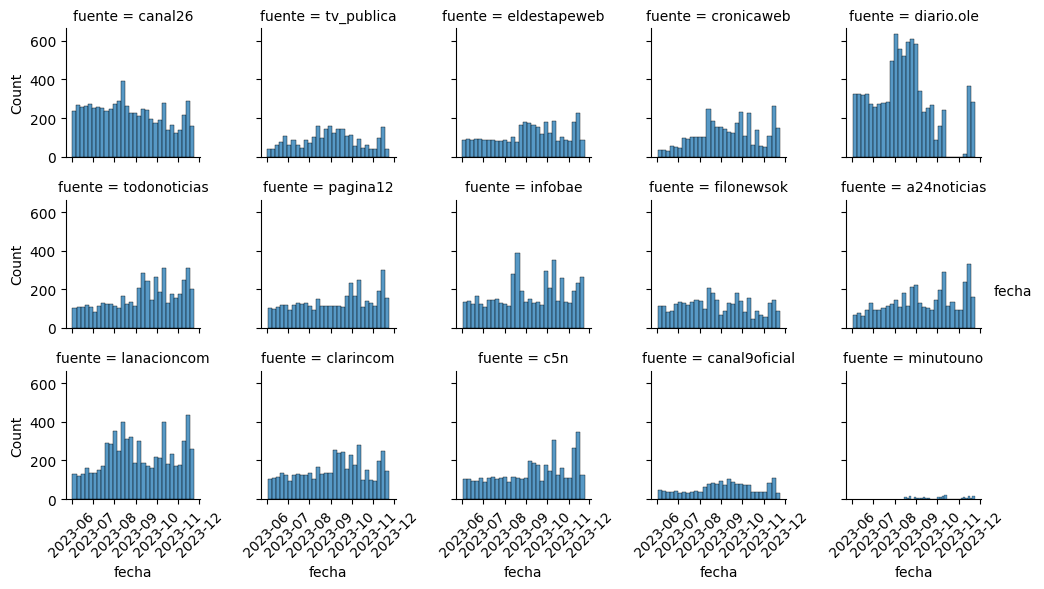

In [12]:
h = sns.FacetGrid(df_graficar, col="fuente", height=2,col_wrap=5)
h.map(sns.histplot, "fecha",bins=30)
for axes in h.axes.flat:
    axes.tick_params(axis='x', which='both', rotation=45)

h.figure.tight_layout()  
h.add_legend(title='fecha')

# Publicaciones politicas

In [14]:
publicaciones_pol = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/publicaciones_politicas.csv')

In [15]:
publicaciones_pol.columns

Index(['cantidad_likes', 'fecha', 'fuente', 'Partido'], dtype='object')

Text(0.5, 1.0, 'Publicaciones politicas')

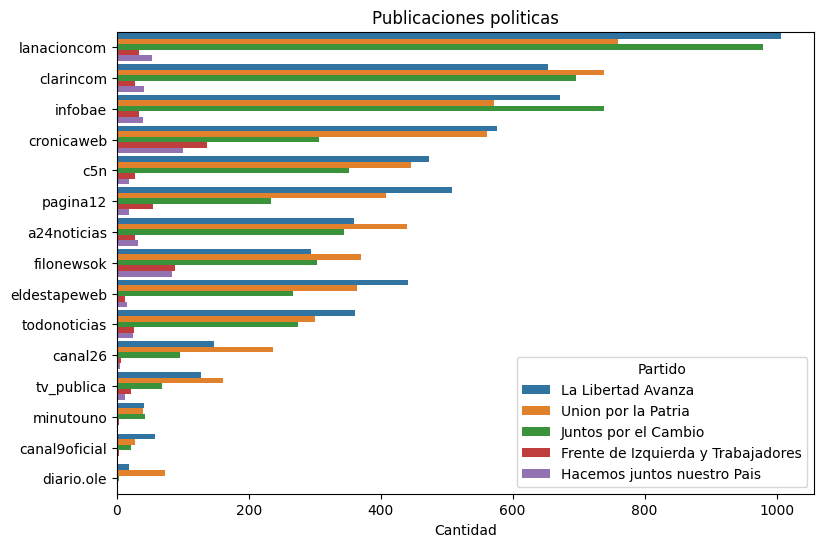

In [16]:
plt.figure(figsize=(9,6))
orden = publicaciones_pol['fuente'].value_counts().index 
hue_orden = publicaciones_pol['Partido'].value_counts().index 
sns.countplot(data=publicaciones_pol, y = 'fuente',
              hue='Partido',
              order=orden,
              dodge=True,
              hue_order=hue_orden,
              width=0.9)
plt.ylabel('')
plt.xlabel('Cantidad')
plt.title('Publicaciones politicas')


Text(0.5, 1.0, 'Likes por Partidos')

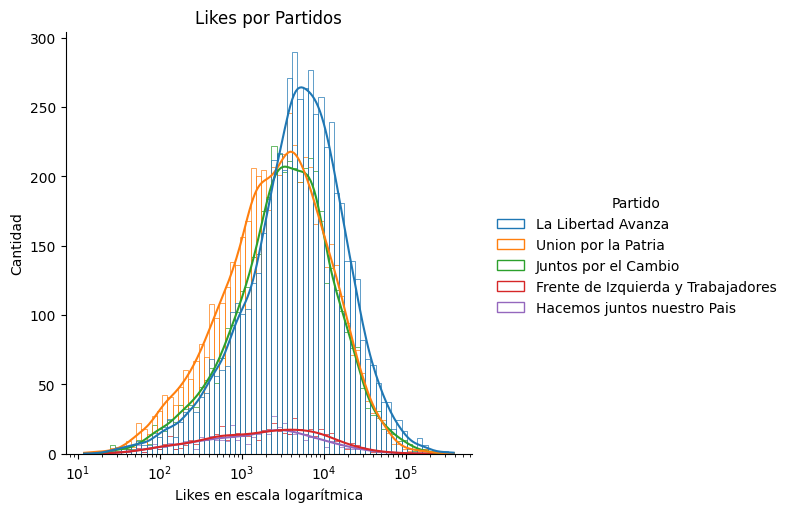

In [17]:
sns.displot(data=publicaciones_pol,x='cantidad_likes',hue='Partido',
            kde=True,aspect=1, fill=False,log_scale=True)
plt.xlabel('Likes en escala logarítmica')
plt.ylabel('Cantidad')
plt.title('Likes por Partidos')

In [18]:
publicaciones_pol.columns

Index(['cantidad_likes', 'fecha', 'fuente', 'Partido'], dtype='object')

In [41]:
def pasar_a_datetime(fecha):
    #format_string = '%Y-%m-%d'
    anio,mes,dia= fecha.split('-')
    aux_dia = dia.split(' ')
    if len(aux_dia)>1:dia = aux_dia[0]
    res = datetime.datetime(int(anio),int(mes),int(dia))
    return res

In [42]:
publicaciones_pol['fecha'] = publicaciones_pol['fecha'].map(lambda x:pasar_a_datetime(x))

Text(5.484787037037046, 0.5, '')

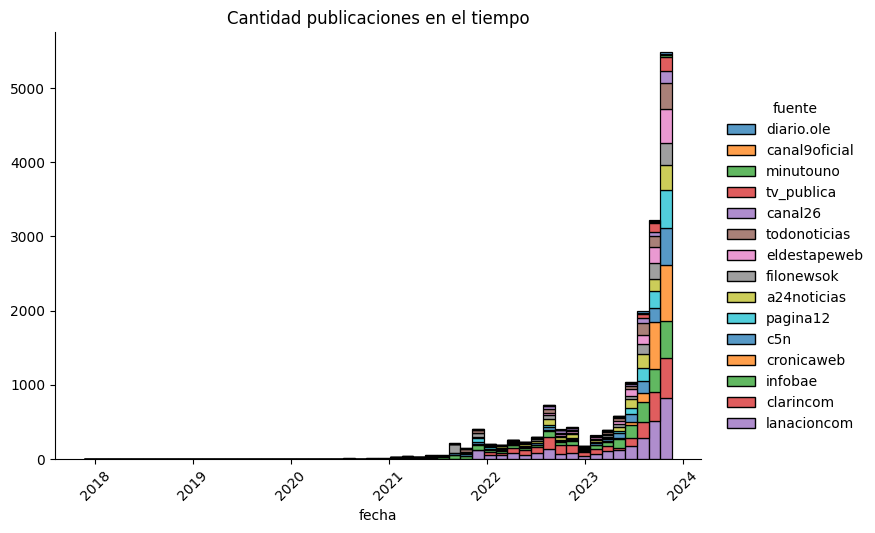

In [43]:
orden_hue = publicaciones_pol['fuente'].value_counts().index 
sns.displot(data=publicaciones_pol,x="fecha", hue="fuente", 
            multiple="stack",palette='tab10',kind='hist',
            hue_order=orden_hue[::-1],
            bins=50,aspect=1.5)
plt.xticks(rotation=45)
plt.title('Cantidad publicaciones en el tiempo')
plt.ylabel('')

# Cantidad likes
Para una fuente en especifico

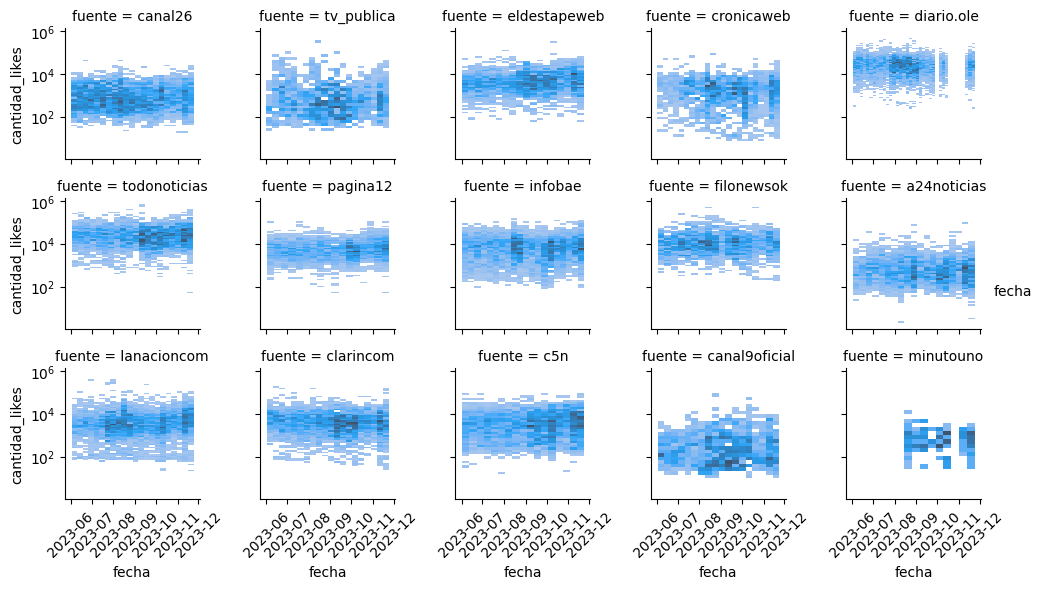

In [20]:
g = sns.FacetGrid(df_graficar, col="fuente", height=2,col_wrap=5)
plot = g.map(sns.histplot, "fecha", "cantidad_likes",log_scale=(False, True))
for axes in g.axes.flat:
    axes.tick_params(axis='x', which='both', rotation=45)

g.figure.tight_layout()  
g.add_legend(title='fecha')


Text(0.5, 1.0, 'Distribucion cantidad likes de publicaciones')

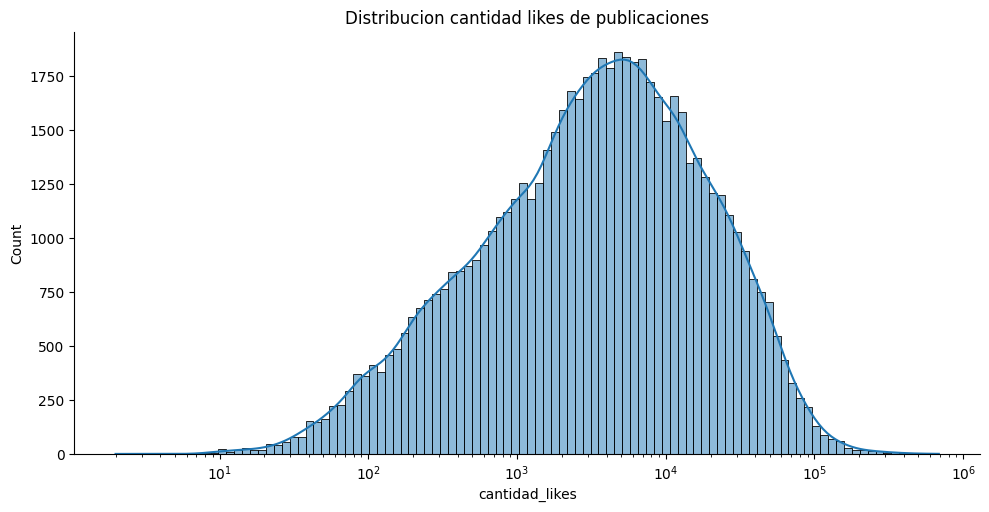

In [21]:
sns.displot(data=df_graficar,log_scale=True,x='cantidad_likes',kde=True,aspect=2.0)
plt.title('Distribucion cantidad likes de publicaciones')

Text(0.5, 1.0, 'Likes de publicaciones')

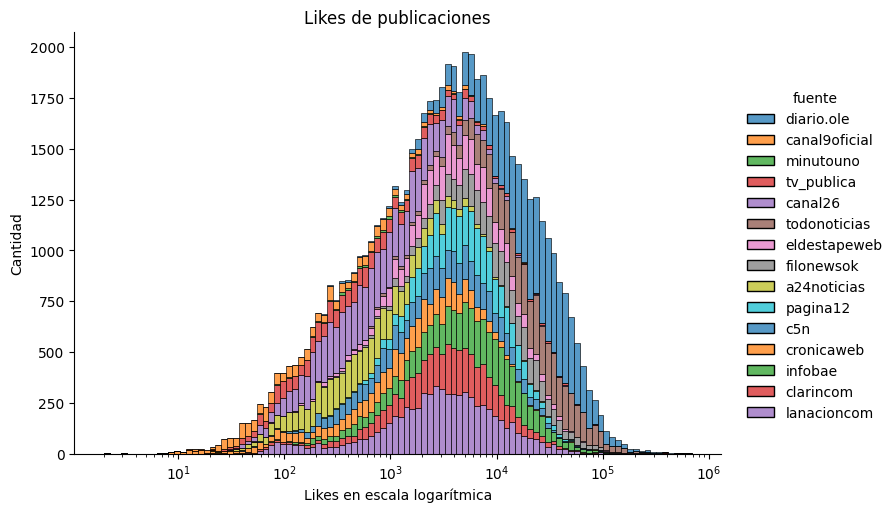

In [22]:
hue_orden = publicaciones_pol['fuente'].value_counts().index 
sns.displot(data=df_graficar,log_scale=True,x='cantidad_likes',
            aspect=1.5,hue='fuente',hue_order=hue_orden[::-1],bins=100,
            multiple='stack',palette='tab10')
plt.xlabel('Likes en escala logarítmica')
plt.ylabel('Cantidad')
plt.title('Likes de publicaciones')

#REVISANDO ACTUALIZACIONES


In [23]:
consulta_act = """
            SELECT *
            FROM Fuentes
                """

In [24]:
df = pasar_a_DF(consultar(consulta_act))

In [25]:
df.sort_values(by='cant_publicaciones',inplace=True)

Text(0.5, 0, '')

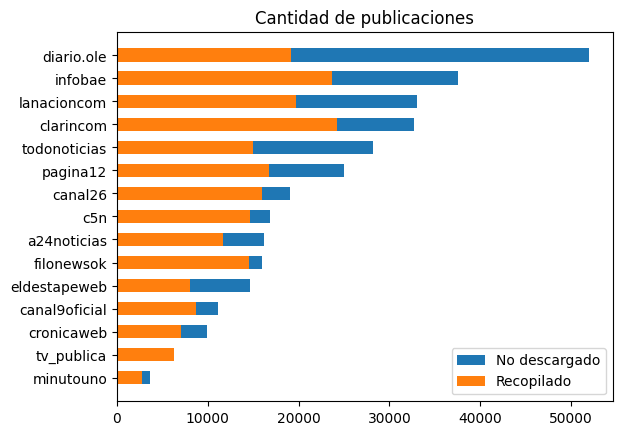

In [26]:
fuentes = df['nombre'].unique()
cant_publicaciones = {
    "No descargado": df['cant_publicaciones'].to_numpy(),
    "Recopilado": df['cant_recopilado'].to_numpy(),
}
width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(15)

for boolean, pub in cant_publicaciones.items():
    p = ax.barh(fuentes, pub, width, label=boolean)
    bottom += pub

ax.set_title("Cantidad de publicaciones")
ax.legend(loc="lower right")
ax.set_xlabel('')

Text(0.5, 0, 'Cantidad')

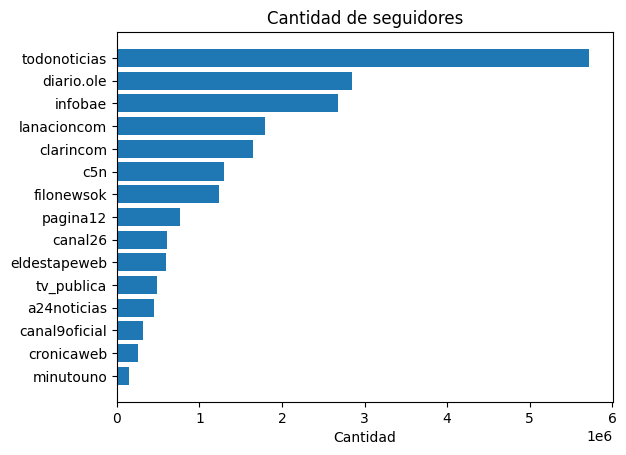

In [27]:
cant_seguidoress = df['cant_seguidores'].sort_values(ascending=True).to_numpy()
fuentes = df.sort_values(by='cant_seguidores',ascending=True)['nombre'].unique()
cant_seguidores = {
    "Cant. Publicaciones": cant_seguidoress,
}
width = 0.8

fig, ax = plt.subplots()
bottom = np.zeros(15)

for nombre, pub in cant_seguidores.items():
    p = ax.barh(fuentes, pub, width, label=nombre)
    bottom += pub

ax.set_title("Cantidad de seguidores")
ax.set_xlabel('Cantidad')


# Encuestas

In [28]:
def pasar_a_datetime(fecha):
    #format_string = '%Y-%m-%d'
    anio,mes,dia= fecha.split('-')
    aux_dia = dia.split(' ')
    if len(aux_dia)>1:dia = aux_dia[0]
    res = datetime.datetime(int(anio),int(mes),int(dia))
    return res

In [30]:
encuestas = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/getting_data/encuestas/Encuestas_primera_vuelta.csv')
ballojate = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/getting_data/encuestas/Encuestas_solo_ballotaje.csv')

In [31]:
ballojate['Inicio'] = ballojate['Inicio'].map(lambda x:pasar_a_datetime(x))
ballojate['Final'] = ballojate['Final'].map(lambda x:pasar_a_datetime(x))
encuestas['Inicio'] = encuestas['Inicio'].map(lambda x:pasar_a_datetime(x))
encuestas['Final'] = encuestas['Final'].map(lambda x:pasar_a_datetime(x))

In [32]:
ballojate.sort_values(by='Inicio',ascending=True,inplace=True)
ejex = np.arange(len(ballojate))
encuestas.sort_values(by='Inicio',ascending=True,inplace=True)
ejex = np.arange(len(encuestas))

In [33]:
partidos = ballojate.columns[:2]
partidos = encuestas.columns[:5]

Text(0, 0.5, 'Porcentaje')

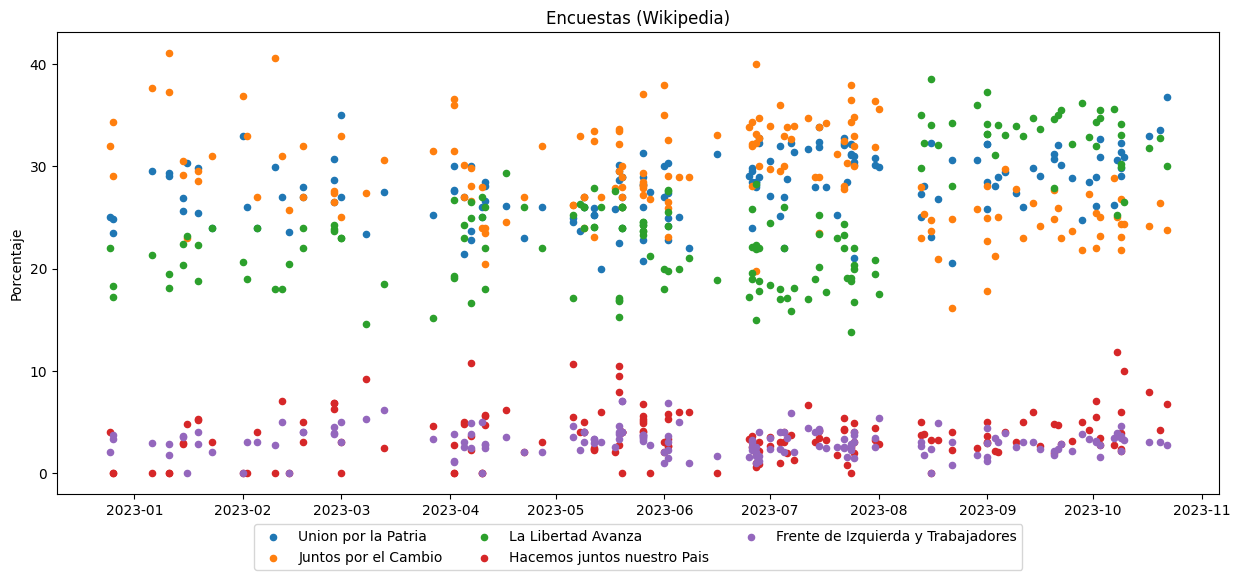

In [34]:
plt.figure(figsize=(15,6))
for p in partidos:
    plt.scatter(encuestas['Inicio'],encuestas[p],label = p,s=20)
#plt.legend(loc='upper right',bbox_to_anchor=(1.4, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Encuestas (Wikipedia)')
plt.ylabel('Porcentaje')

In [ ]:
# has been moved from /surveys
# Some plots (move it to exploratory analisis)

primera_vuelta = pd.read_csv('FILL')
partidos = ['Union por la Patria','Juntos por el Cambio', 'La Libertad Avanza','Hacemos juntos nuestro Pais', 'Frente de Izquierda y Trabajadores']
colores = ['b','y','purple','black','r']
plt.figure(figsize=(15,7))
for i,p in enumerate(partidos):
    sns.scatterplot(data=primera_vuelta,y=p,x='Final', 
                    #ax=ploteos[i],
                    color=colores[i])


ballotage = pd.read_csv('FILL')
colores = ['b','y','purple','black','r']
plt.figure(figsize=(15,7))
for i,p in enumerate(partidos):
    sns.scatterplot(data=ballotage,y=p,x='Inicio', 
                    #ax=ploteos[i],
                    color=colores[i])
